
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [41]:
# complete here if you want to include more columns
salary_col = 'salary_monthly_NETO'
lang_col = 'tools_programming_languages'
framework_col = 'tools_frameworks'
relevant_columns = [
    'tools_programming_languages', 
    'salary_monthly_NETO', 
    'salary_monthly_BRUTO',
    'tools_work_pc_os',
    'work_contract_type',
    'tools_frameworks',
    'profile_years_experience',
    'salary_satisfaction',
    'company_main_activity',
    'salary_in_usd',
    'work_role',
    'work_years_in_company',
    'profile_gender',
    'profile_age'
]

In [26]:
# Normalize columns types
df['salary_monthly_NETO'] = df['salary_monthly_NETO'].astype(float)

/Users/lucianomantovani/opt/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

def remove_outlier(df_in, col_name, iqr_factor = 1.5):
    """
    IQR outliers removal (https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/)
    accept a dataframe, remove outliers, return cleaned data in a new dataframe
    see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
    """
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1 # interquartile range
    fence_low  = q1 - iqr_factor*iqr
    fence_high = q3 + iqr_factor*iqr
    df_inliers = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    df_outliers = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
    return df_inliers, df_outliers

In [5]:
display(len(df))

df_inliers, df_outliers = remove_outlier(df, 'salary_monthly_NETO', 3.5)

# inliers percent over total
display(len(df_inliers)/len(df))

# display df without outliers
df_inliers['salary_monthly_NETO'].describe()

6095

0.9351927809680065

count      5700.000000
mean      81995.646064
std       46605.212590
min           1.000000
25%       50000.000000
50%       75000.000000
75%      102000.000000
max      290000.000000
Name: salary_monthly_NETO, dtype: float64

In [6]:
# Salario Mínimo en Argentina
# referencia: https://es.wikipedia.org/wiki/Anexo:Salario_m%C3%ADnimo_en_Argentina

min_salary_2021 = float(16875) # de Octubre 2019 a Octubre del 2020 (la encuesta es de Julio/Agosto 2020)

df_outliers_lower_limit = df_inliers.query('salary_monthly_NETO < @min_salary_2021/2.0')
df_inliers_lower_limit = df_inliers.query('salary_monthly_NETO >= @min_salary_2021/2.0')

df = df_inliers_lower_limit
df['salary_monthly_NETO'].describe()

### Curacion de lenguajes de programacion

In [70]:
# Create a new column with the list of languages
df_inliers.loc[:, 'cured_programming_languages'] = df_inliers.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

df_lang = df_inliers.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})\
    .reset_index(drop=True)

# Filter out languages that we want to exclude
# Complete here with your selected list.
interesting_languages = ["javascript", "sql", "html", "python", "java", "php"\
                         , ".net", "typescript", "c#", "go", "c++", "c", "vba", "kotlin", "swift"]
df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,tools_work_pc_os,work_contract_type,tools_frameworks,profile_years_experience,salary_satisfaction,company_main_activity,salary_in_usd,work_role,work_years_in_company,profile_gender,profile_age,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,GNU/Linux,Full-Time,"Django, jQuery",5.0,2.0,Otras industrias,NaN,Developer,2.0,Hombre,29.0,"[html, javascript, python]"
2,javascript,"HTML, Javascript, Python",63000.0,79000.0,GNU/Linux,Full-Time,"Django, jQuery",5.0,2.0,Otras industrias,NaN,Developer,2.0,Hombre,29.0,"[html, javascript, python]"
3,python,"HTML, Javascript, Python",63000.0,79000.0,GNU/Linux,Full-Time,"Django, jQuery",5.0,2.0,Otras industrias,NaN,Developer,2.0,Hombre,29.0,"[html, javascript, python]"
6,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,GNU/Linux,Full-Time,"jQuery, WordPress",15.0,3.0,Otras industrias,NaN,SysAdmin / DevOps / SRE,15.0,Hombre,39.0,"[bash/shell, c, css, html, java, javascript, p..."
8,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,GNU/Linux,Full-Time,"jQuery, WordPress",15.0,3.0,Otras industrias,NaN,SysAdmin / DevOps / SRE,15.0,Hombre,39.0,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16705,java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16706,javascript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16707,php,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16708,python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analisis de roles

### Cuales son los roles para los que hay mas datos?

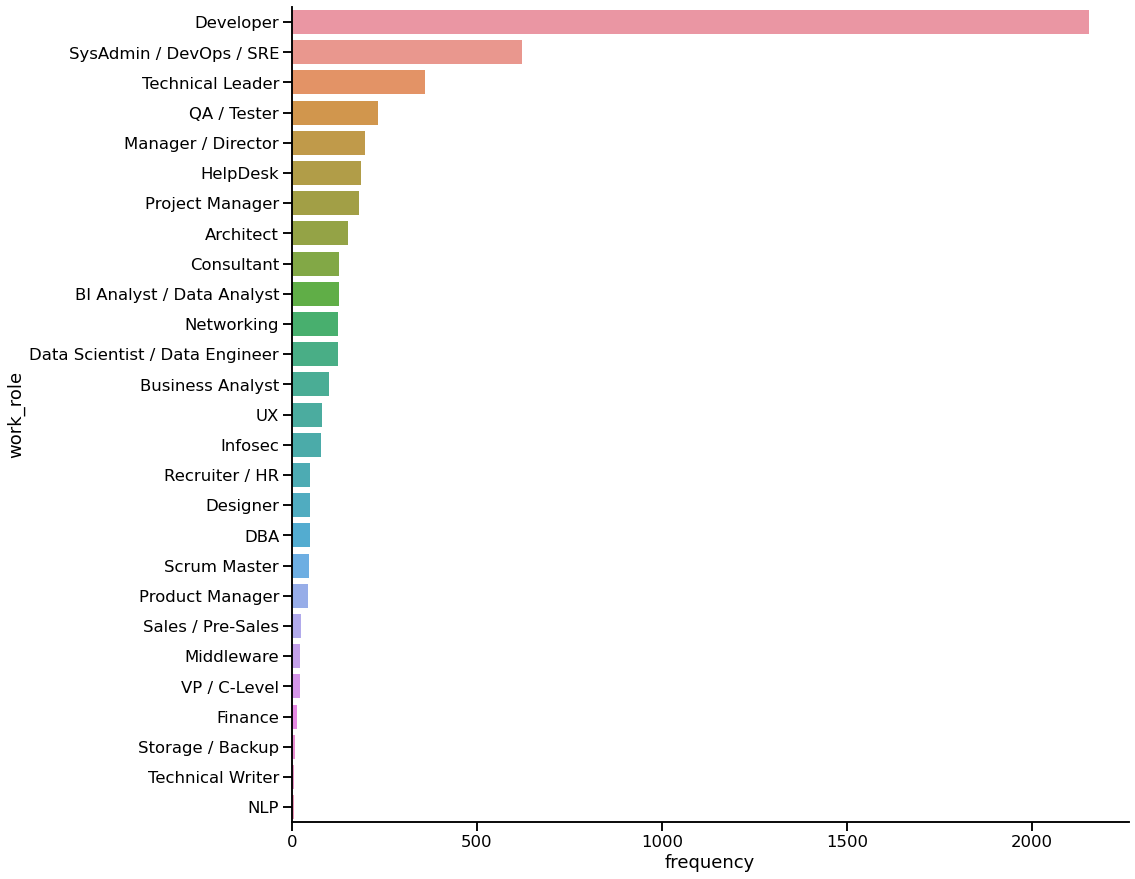

In [73]:
df_roles_count=df['work_role'].value_counts().reset_index().rename(columns={'index':'work_role', 'work_role':'frequency'})
fig = plt.figure(figsize=(15,15))
seaborn.barplot(data = df_roles_count[df_roles_count['frequency'] > 5], x='frequency', y='work_role')
seaborn.despine()

### Cuales son los roles que ganan mas?

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='work_role'>

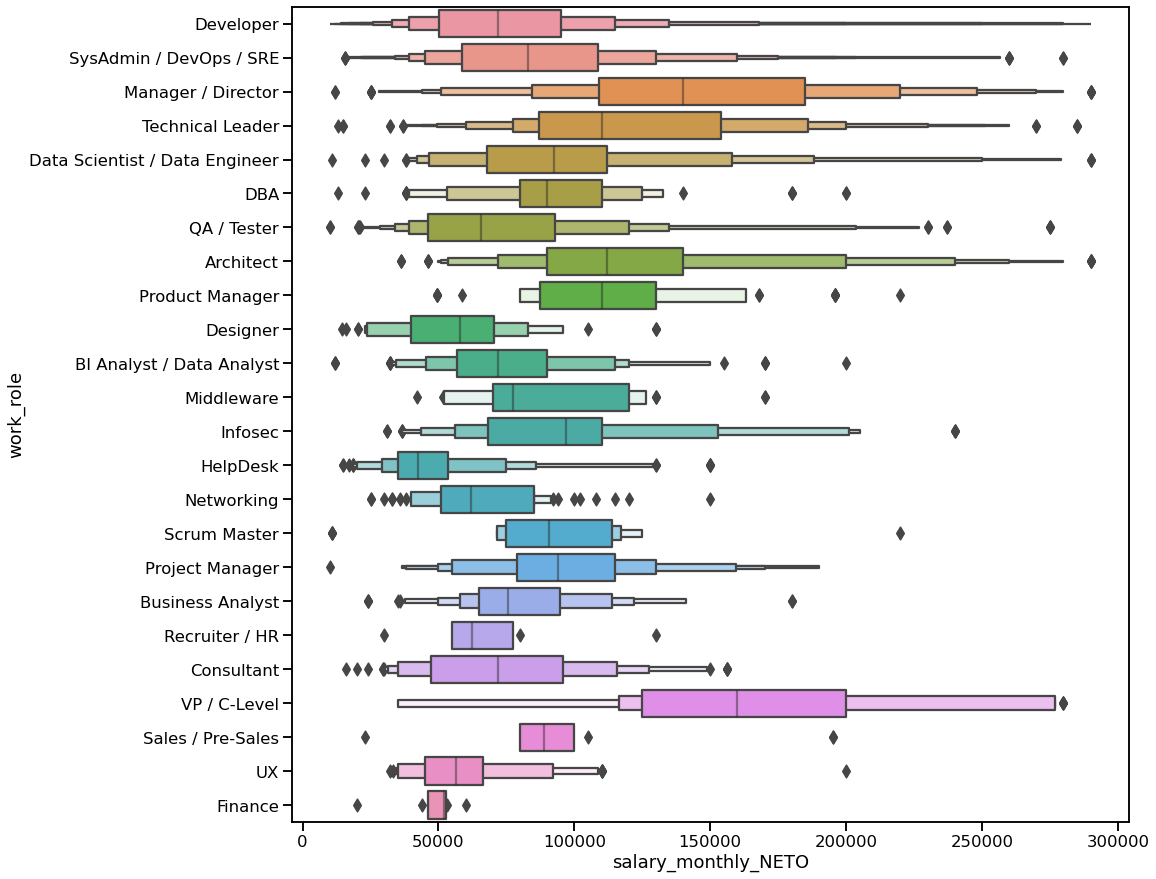

In [74]:
fig = plt.figure(figsize=(15,15))
df_key_roles = df_lang[df_lang["work_role"]\
                          .isin(df_roles_count[df_roles_count["frequency"] > 10]["work_role"])]
seaborn.boxenplot(data = df_key_roles, y='work_role', x='salary_monthly_NETO')

### Como nos interesa visualizar los roles viendolos desde el punto de vista del lenguaje de programacion?

- Los roles mejor pagos
- Los que estan fuertemente relacionados a lenguajes de programacion.

Como calificamos a los roles?

- Roles de desarrollo:
    - Developer
    - SysAdmin / DevOps / SRE
    - QA / Tester
    - Consultant
    - Networking
    - Designer
- Roles de liderazgo
    - Manager / Director
    - Architect
    - Project Manager
    - Consultant
    - Technical leader
    - Scrum Master
- Roles de Analisis de negocio
    - BI Analyst / Data Analyst + Business Analyst = Business Analist
    - Data Scientist / Data Engineer
- Roles de soporte IT
    - DBA
    - HelpDesk

In [102]:
#seaborn.countplot(y='programming_language', data=df_lang[df_lang['work_role'] == 'Designer'])

# Renombro todos los business analyst a BI Analyst / Data Analyst porque son lo mismo
df_lang.loc[df_lang['work_role'] == "Business Analyst", 'work_role'] = "BI Analyst / Data Analyst"
#len(df_lang[df_lang['work_role'] == "BI Analyst / Data Analyst"])

roles={
    "roles_dev" : [
     "Developer",
     "SysAdmin / DevOps / SRE",
     "QA / Tester",
     "Consultant",
     "Networking",
     "Designer"
    ],
    "roles_lead" : [
        "Manager / Director",
        "Architect",
        "Project Manager",
        "Consultant",
        "Technical leader",
        "Scrum Master"
    ],
    "roles_bi" : [
        "BI Analyst / Data Analyst",
        "Data Scientist / Data Engineer"
    ],
    "roles_it" : [
        "DBA",
        "HelpDesk"
    ]
}

Ahora es la parte donde graficamos los lenguajes relevantes, con un histograma de puntos separado por rol, donde separe los distintos sueldos de cada uno, para cada lenguaje

<AxesSubplot:xlabel='count', ylabel='programming_language'>

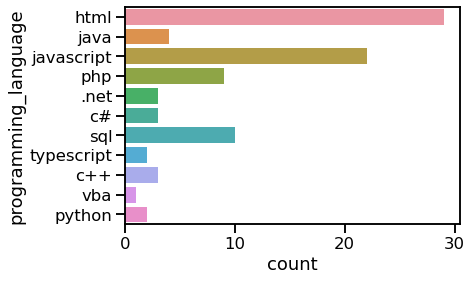

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,tools_work_pc_os,work_contract_type,tools_frameworks,profile_years_experience,salary_satisfaction,company_main_activity,salary_in_usd,work_role,work_years_in_company,profile_gender,profile_age,cured_programming_languages
0,html,"HTML, Javascript, Python",63000.0,79000.0,GNU/Linux,Full-Time,"Django, jQuery",5.0,2.0,Otras industrias,NaN,Developer,2.0,Hombre,29.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,GNU/Linux,Full-Time,"Django, jQuery",5.0,2.0,Otras industrias,NaN,Developer,2.0,Hombre,29.0,"[html, javascript, python]"
2,python,"HTML, Javascript, Python",63000.0,79000.0,GNU/Linux,Full-Time,"Django, jQuery",5.0,2.0,Otras industrias,NaN,Developer,2.0,Hombre,29.0,"[html, javascript, python]"
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,GNU/Linux,Full-Time,"jQuery, WordPress",15.0,3.0,Otras industrias,NaN,SysAdmin / DevOps / SRE,15.0,Hombre,39.0,"[bash/shell, c, css, html, java, javascript, p..."
4,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,GNU/Linux,Full-Time,"jQuery, WordPress",15.0,3.0,Otras industrias,NaN,SysAdmin / DevOps / SRE,15.0,Hombre,39.0,"[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13012,java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13013,javascript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13014,php,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13015,python,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ejercicio 1 - Analisis Descriptivo

In [90]:
df_lang[df_lang["programming_language"] == "python"]["work_role"]

3                      Developer
12       SysAdmin / DevOps / SRE
31       SysAdmin / DevOps / SRE
35                     Developer
37                     Developer
                  ...           
16681                  Developer
16686    SysAdmin / DevOps / SRE
16688                 Networking
16691    SysAdmin / DevOps / SRE
16708                        NaN
Name: work_role, Length: 1358, dtype: object

/Users/lucianomantovani/opt/miniconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


ValueError: min() arg is an empty sequence

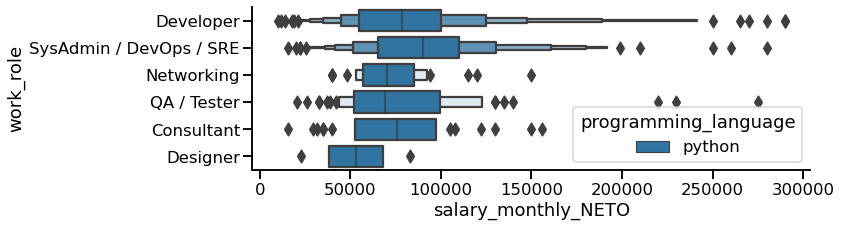

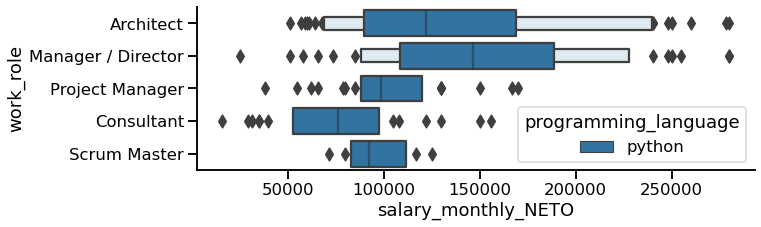

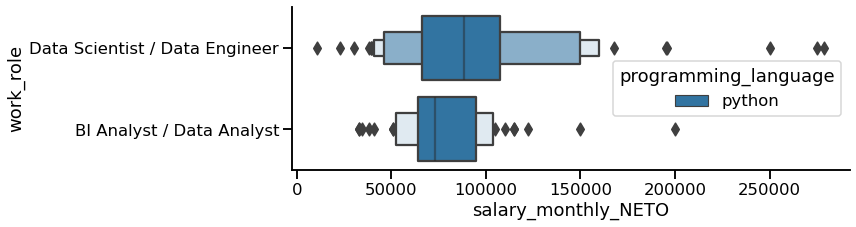

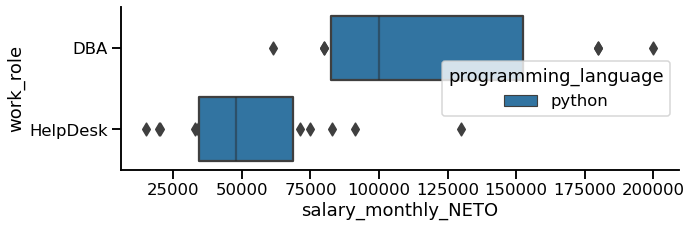

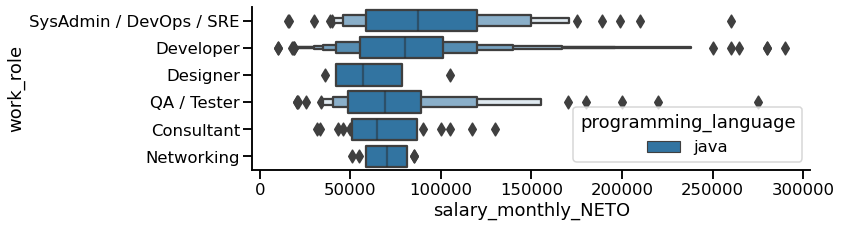

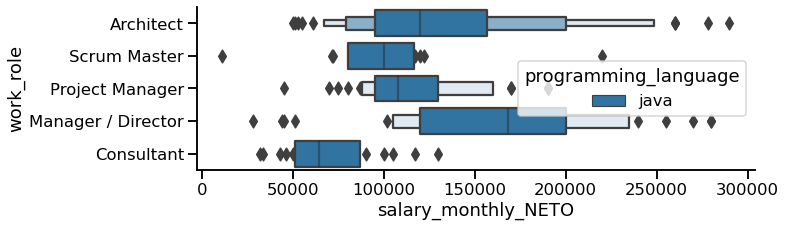

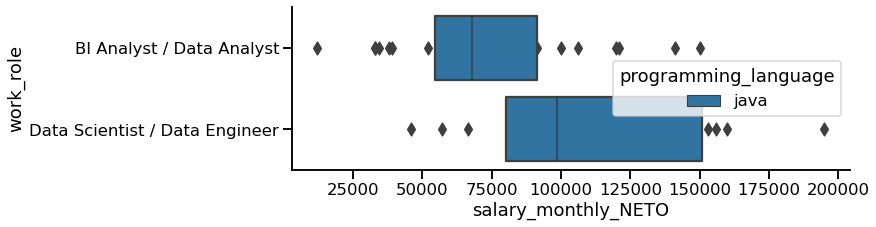

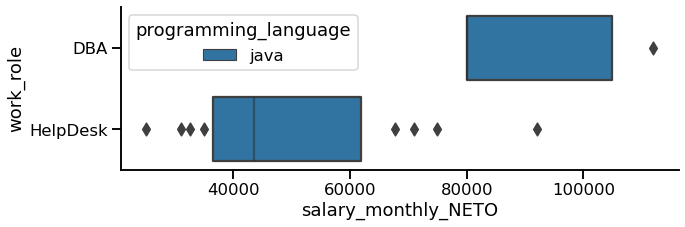

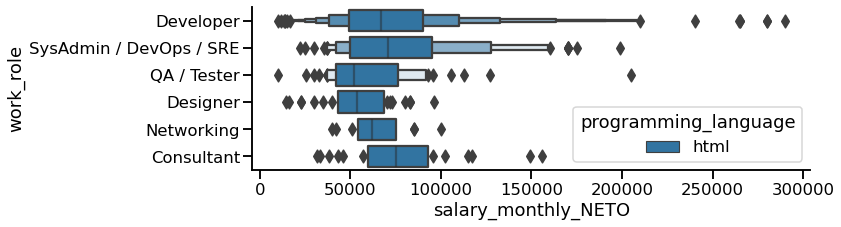

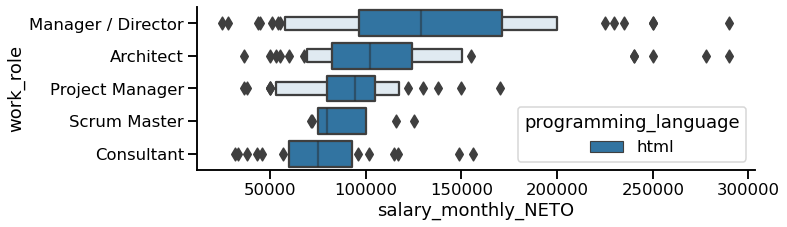

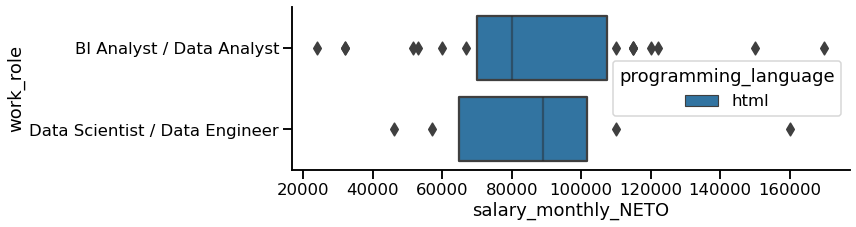

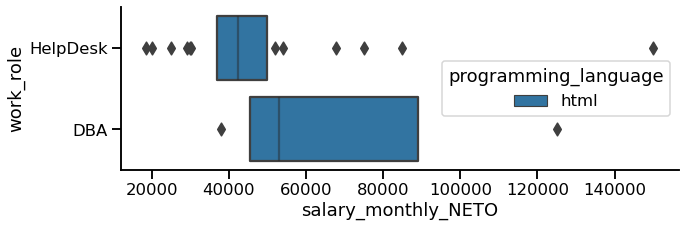

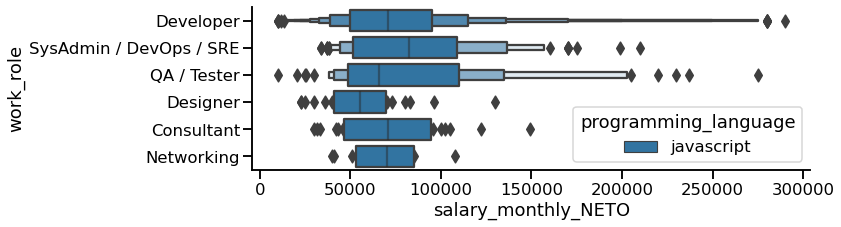

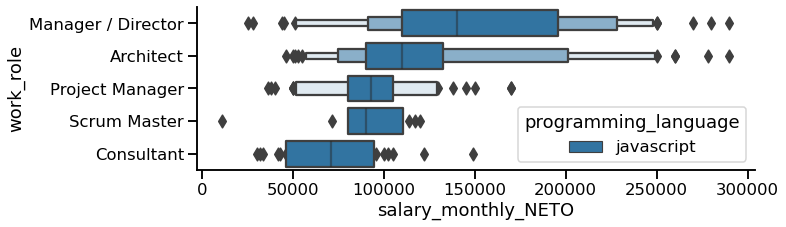

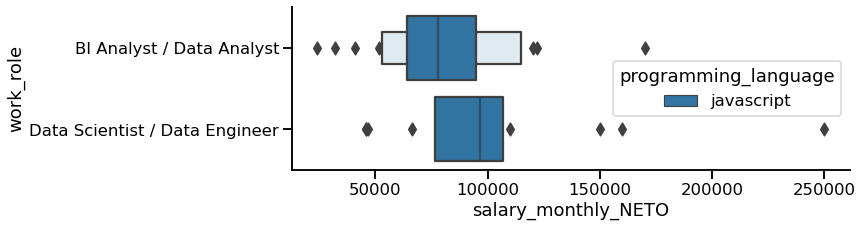

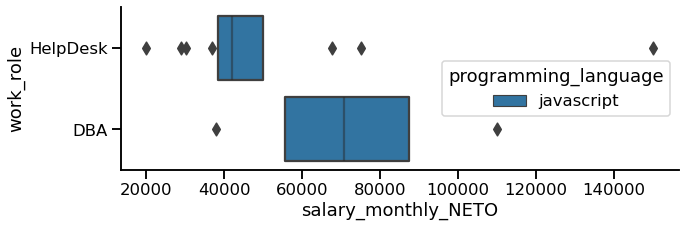

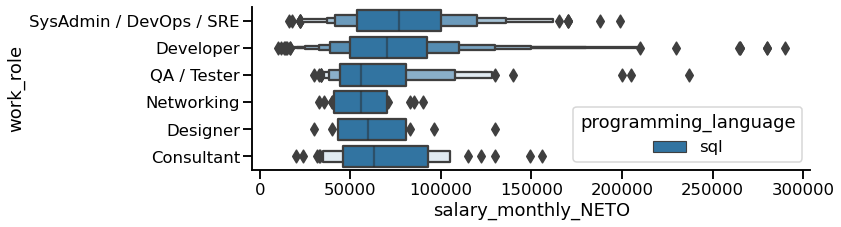

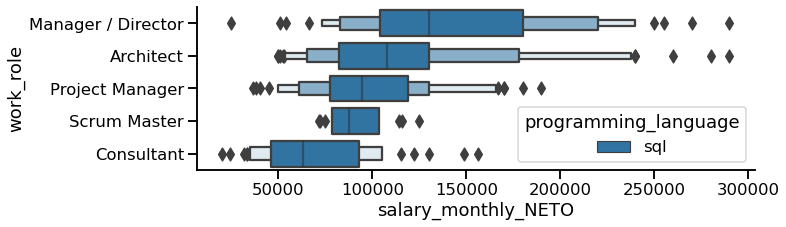

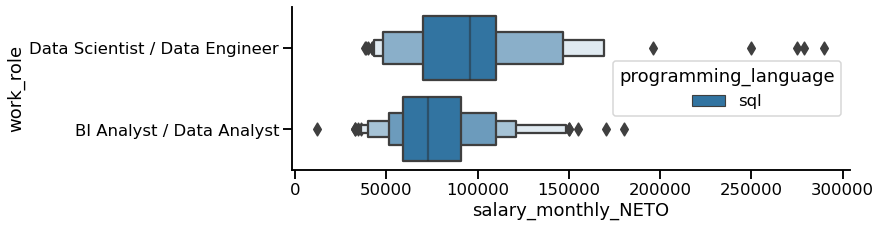

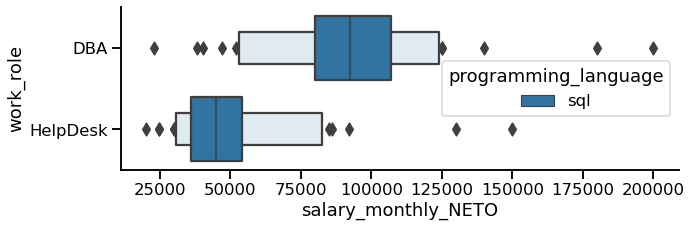

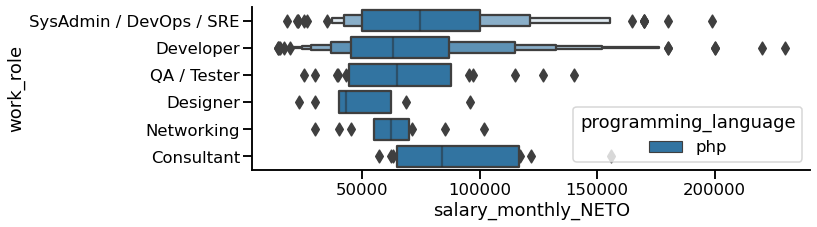

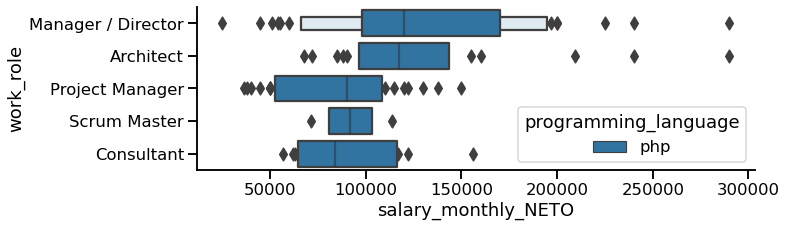

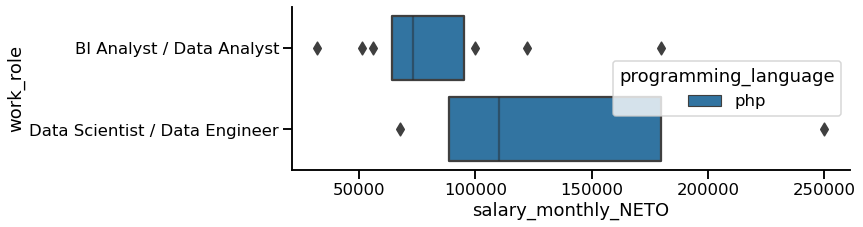

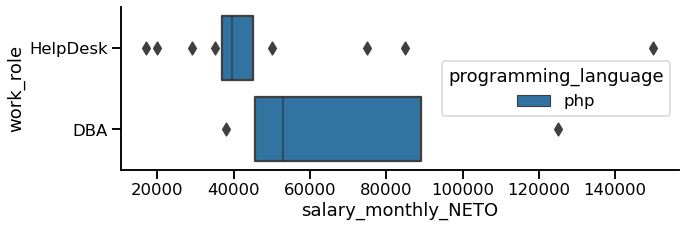

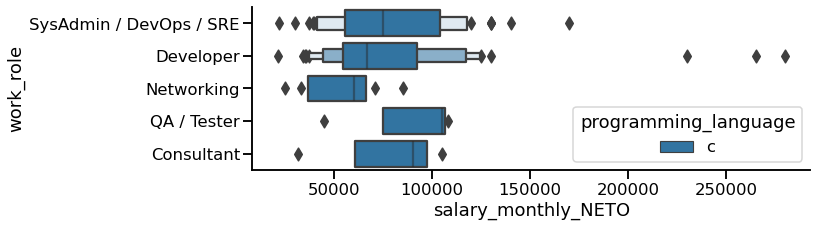

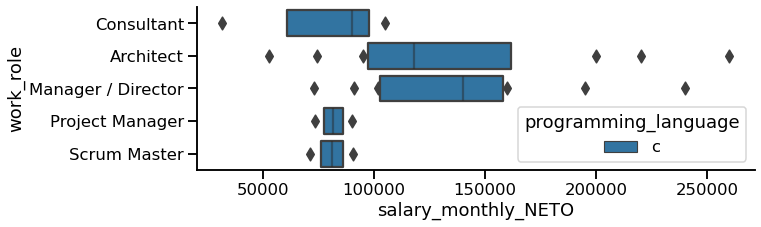

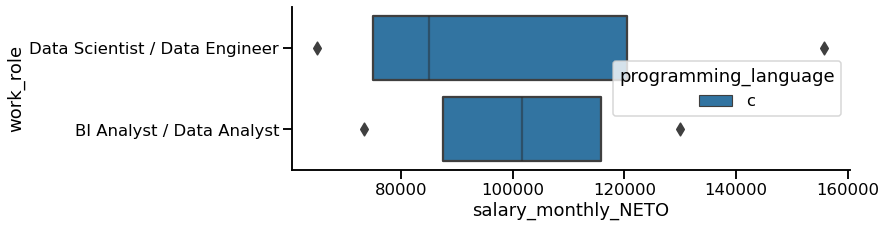

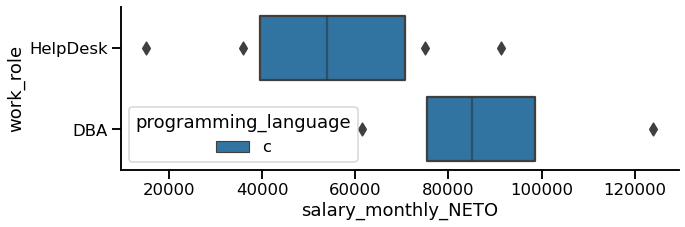

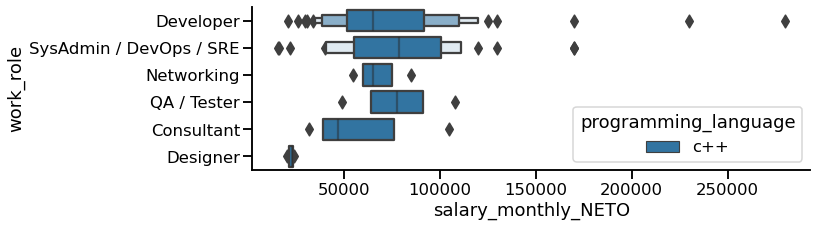

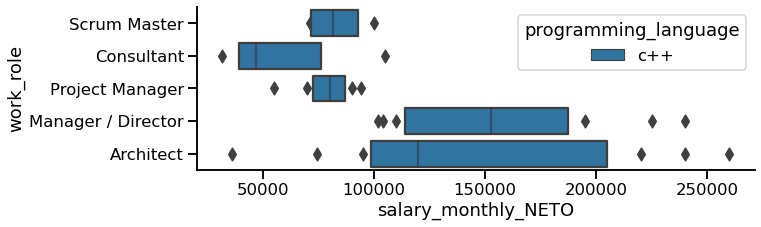

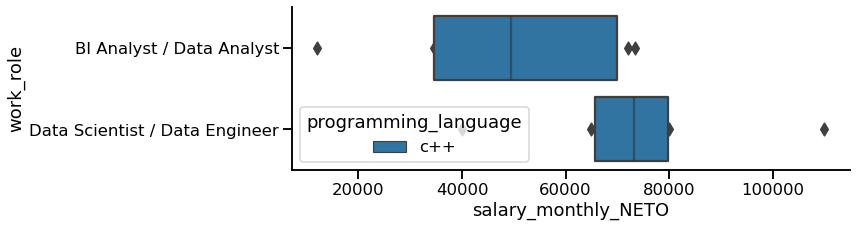

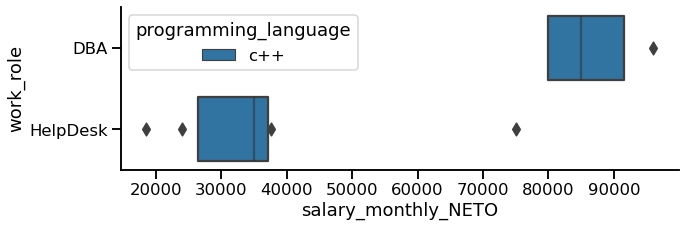

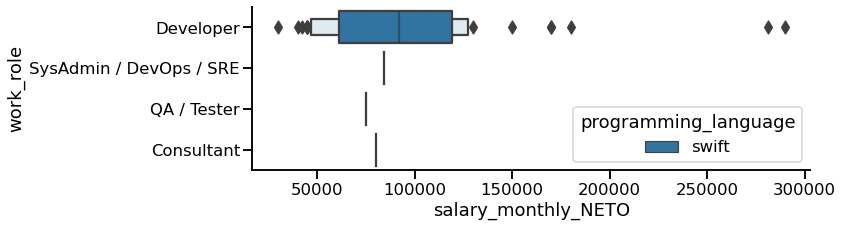

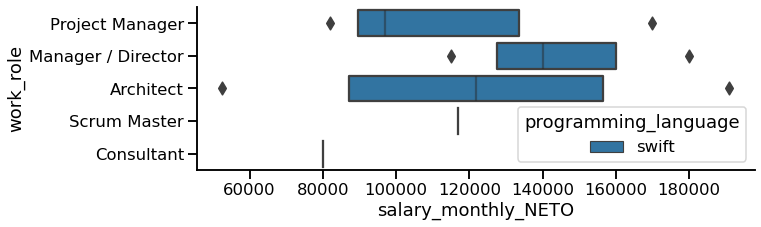

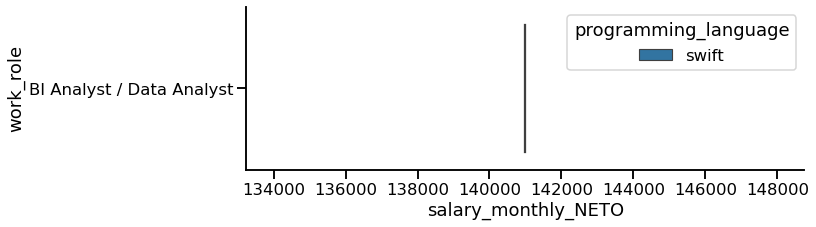

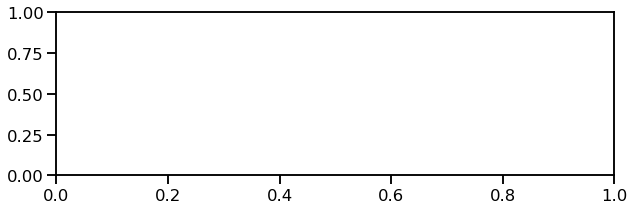

In [105]:
programming_languages = ['python', 'java', 'html', 'javascript', 'sql', 'php', 'c', 'c++', 'swift']
#fig, axes = plt.subplots(nrows=len(programming_languages), figsize=(16, 10))

for lang in programming_languages:
    for role in roles:
        df_lang_x = df_lang[df_lang["programming_language"] == lang]
        fig, axes = plt.subplots(nrows=1, figsize=(10, 3))
        g = seaborn.boxenplot(
            data=df_lang_x[df_lang_x["work_role"].isin(roles[role])], 
            x='salary_monthly_NETO',
            y='work_role',
            hue="programming_language"
        )
        plt.ticklabel_format(style='plain', axis='x')
        seaborn.despine()

NameError: name 'df_lang' is not defined

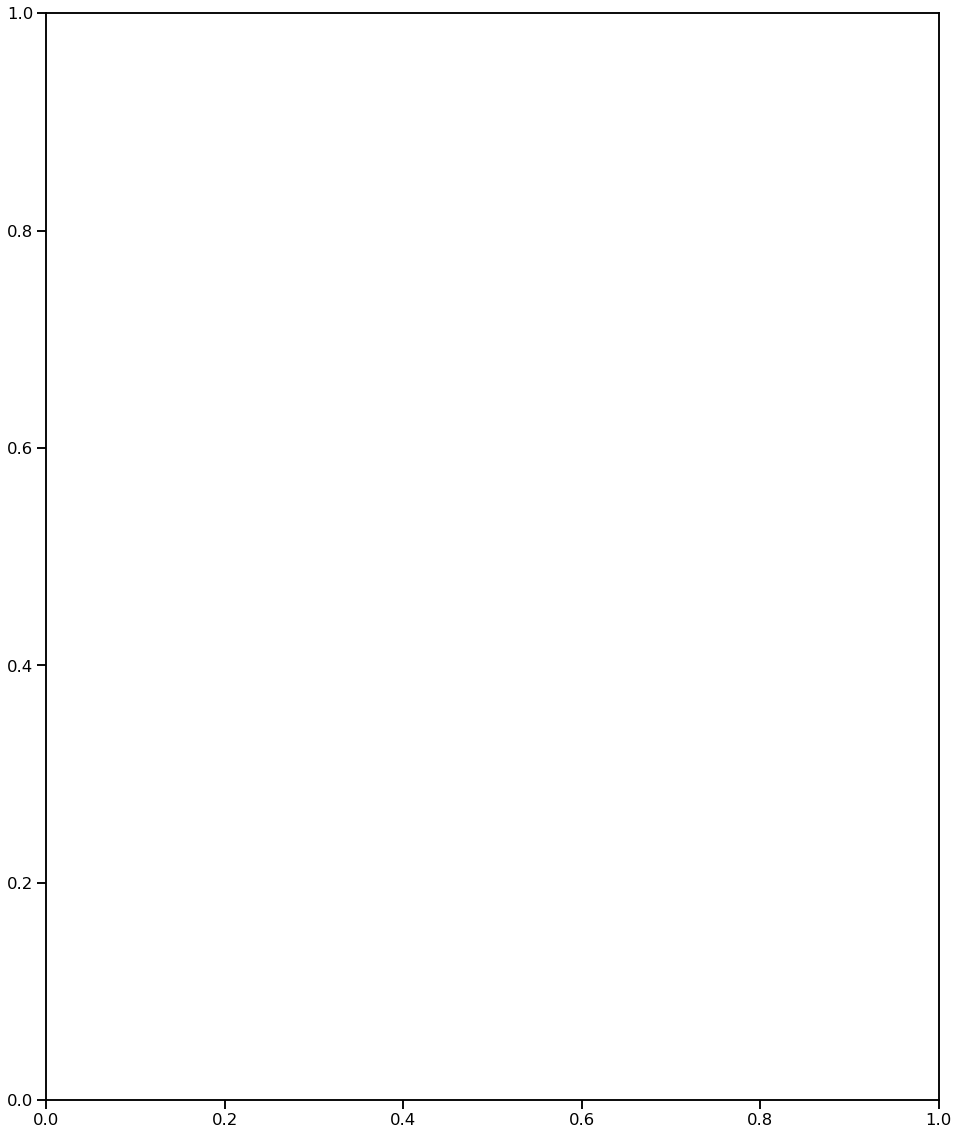

In [22]:
fig, axes = plt.subplots(nrows=1, figsize=(16, 20))
g = seaborn.boxenplot(
    data=remove_outlier(df_lang["programming_language"], "salary_monthly_NETO")[0], 
    x='salary_monthly_NETO',
    y='work_role',
    hue="programming_language"
)
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

In [21]:
language_count = filtered_df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})

NameError: name 'filtered_df_lang' is not defined

In [20]:
fig = plt.figure(figsize=(15,15))
seaborn.barplot(data = language_count[language_count['frequency'] > 11], x='frequency', y='language')
seaborn.despine()

NameError: name 'language_count' is not defined

<Figure size 1080x1080 with 0 Axes>

In [37]:

filtered_df_lang
    
#df.loc[:, ['tools_programming_languages','work_role']]


,programming_language,tools_programming_languages,salary_monthly_NETO,tools_frameworks,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,"Django, jQuery","[html, javascript, python]"
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"jQuery, WordPress","[bash/shell, c, css, html, java, javascript, p..."
3,html,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,"jQuery, WordPress","[bash/shell, c, css, html, java, javascript, p..."
...,...,...,...,...,...
6090,html,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,"Bootstrap, Drupal, jQuery, Symfony, WordPress","[.net, c#, cobol, css, html, javascript, php, ..."
6090,javascript,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,"Bootstrap, Drupal, jQuery, Symfony, WordPress","[.net, c#, cobol, css, html, javascript, php, ..."
6090,php,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,"Bootstrap, Drupal, jQuery, Symfony, WordPress","[.net, c#, cobol, css, html, javascript, php, ..."
6090,sql,".NET, C#, COBOL, CSS, HTML, Javascript, PHP, S...",97000.0,"Bootstrap, Drupal, jQuery, Symfony, WordPress","[.net, c#, cobol, css, html, javascript, php, ..."


#### _Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante_

Asociar el lenguaje de programacion al rol que se declara cada uno nos puede ayudar a brindar detalle sobre el tipo de trabajo que se realiza en cada puesto. De esta manera no solamente podemos inferir sobre el salario de los que trabajan en python, sino ademas de los que usan python para distintos propositos, como puede ser, por ejemplo, desarrollo web, o data science. 

In [38]:
language_count[language_count['frequency'] > 11]

,language,frequency
0,javascript,2223
1,sql,1962
2,html,1662
3,java,1334
4,python,1325
5,php,796
6,.net,749
7,typescript,683
8,c#,664
9,go,257


In [39]:
fig = plt.figure(figsize=(15, 20))
g = seaborn.violinplot(
    data=clean_outliers(filtered_df_lang, "salary_monthly_NETO"), 
    x='salary_monthly_NETO',
    y='programming_language', 
)
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

NameError: name 'clean_outliers' is not defined

<Figure size 1080x1440 with 0 Axes>

In [92]:
len(df_lang[df_lang["programming_language"].isin(language_count[language_count["frequency"] > 10]["language"])])

12018

In [93]:
len(df_lang)

12018